## Diabetes Prediction
Data set - https://www.kaggle.com/johndasilva/diabetes 

In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [5]:
#!pip install numpy==1.16.1

In [2]:
# Load the dataset
df = pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


#### The following features have been provided to help us predict whether a person is diabetic or not:
* Pregnancies: Number of times pregnant

* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

* BloodPressure: Diastolic blood pressure (mm Hg)

* SkinThickness: Triceps skin fold thickness (mm)

* Insulin: 2-Hour serum insulin (mu U/ml)

* BMI: Body mass index (weight in kg/(height in m)2)

* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

* Age: Age (years)

* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [3]:
# Check the # of rows and columns in the dataset
df.shape

(2000, 9)

In [4]:
# check the name of columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Check the data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Check the the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


There are no null values and the data types of all the numerical variable seems correct

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [9]:
#Final check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Rename the long column name 
df = df.rename(columns = {'DiabetesPedigreeFunction': 'DPF'})
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0


### Exploratory data analysis

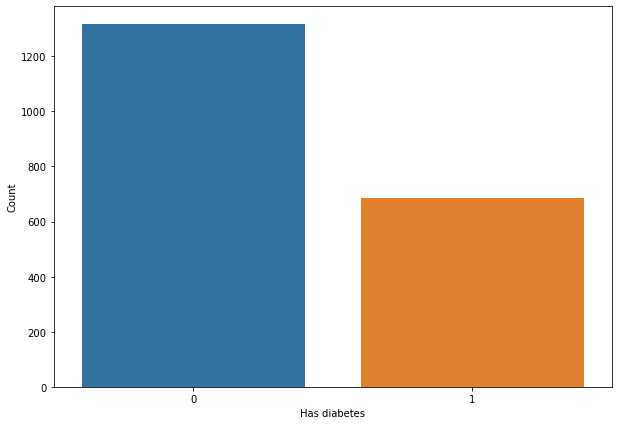

In [11]:
# Check the distribution of the outcome which is a dependant feature
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

plt.xlabel("Has diabetes")
plt.ylabel("Count")
plt.show()

In [14]:
df.groupby('Outcome')["Outcome"].count()

Outcome
0    1316
1     684
Name: Outcome, dtype: int64

#### There are 1316 people who have diabetes and 684 people who do not.

In [34]:
df[df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0].count()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

#### As we can see there are many 0 values in few columns so we need to replace them with apprpriate values

In [35]:
# Creating a copy
df_copy =df.copy()
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

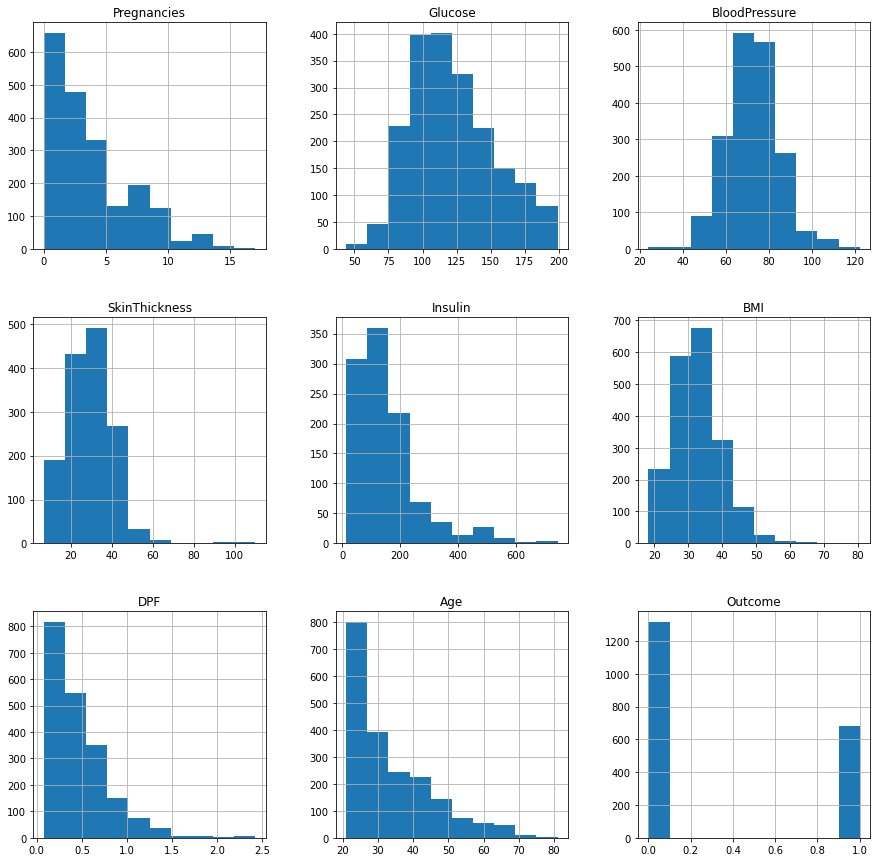

In [36]:
# Observe the distribution of the variables
df_copy.hist(figsize=(15,15));

In [37]:
# Replacing the NaN values
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [40]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

### Model Building

In [46]:
# Divide the dataset into train and test

X = df_copy.drop("Outcome", axis=1)
y = df_copy["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train_size: {}, X_test_size: {}".format(X_train.shape, X_test.shape))

X_train_size: (1600, 8), X_test_size: (400, 8)


In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Function to find out best model

def best_model(X, y):
    models = {
        'logistic_regression': {
            'model' : LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
            }
        },
        
        'decision_tree' : {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters' : {
                'criterion' : ['gini', 'entropy'],
                'max_depth' : [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50, 100,200]
            }
        },
        
        'svm' : {
            'model' : SVC(gamma="auto"),
            'parameters':{
                'C': [1,10,20],
                'kernel': ['rbf', 'linear']
            }
        }
    }
    
    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for model_name, model_params in models.items():
        grid = GridSearchCV(model_params["model"], model_params["parameters"], cv = cv_shuffle, return_train_score=False)
        grid.fit(X, y)
        scores.append({
            'model': model_name,
            "best_parameters": grid.best_params_,
            "score": grid.best_score_
        })
        
    return pd.DataFrame(scores, columns=["model", "best_parameters", "score"])

best_model(X_train_scaled, y_train)
    

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.758750
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.898125
2,random_forest,{'n_estimators': 100},0.954375
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.864375


#### We will use random forest and further tune the model to increase the accuracy of the model

In [53]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20,random_state=0),X_train_scaled, y_train, cv=10)

print("Accuracy Score : {}%".format(round(np.mean(scores)*100,3)))

Accuracy Score : 96.187%


In [55]:
# Create random forest model
model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

### Model Evaluation

In [56]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

array([[269,   3],
       [  1, 127]], dtype=int64)

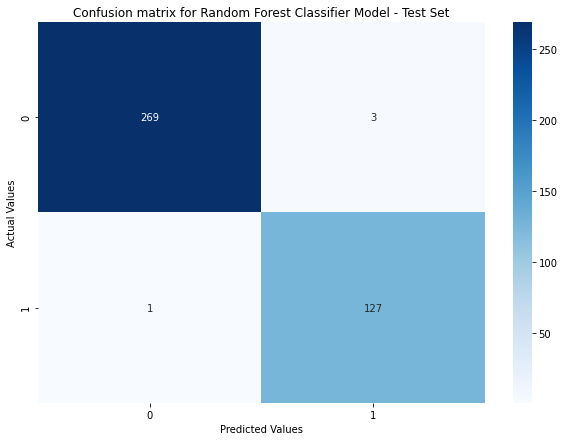

In [57]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [58]:
# Accuracy scores
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on the test set: {}%".format(score))

Accuracy on the test set: 99.0%


In [59]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       272
           1       0.98      0.99      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



#### Checking whether we are not overfitting

In [60]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_train_scaled)
cm = confusion_matrix(y_train, y_pred)
cm

array([[1043,    1],
       [   1,  555]], dtype=int64)

In [62]:
score = accuracy_score(y_train, y_pred)
print("Accuracy score on train set: {}%".format(score*100))

Accuracy score on train set: 99.875%


In [63]:
# Classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



### We observed that we are getting an accuracy score of 99% on the test dataset which is a very good score that can be achieved on this data set. We have also confirmed that we are not overfitting on the train set.